In [49]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
!pip install seaborn

  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
texts = '''
21.12V,0.01A,0.29W
21.12V,0.12A,2.47W
21.09V,0.04A,0.91W
21.22V,0.01A,0.29W
21.17V,0.00A,0.00W
21.19V,0.06A,1.23W
21.14V,0.03A,0.60W
21.12V,0.04A,0.91W
21.19V,0.03A,0.60W
21.14V,0.03A,0.60W
21.12V,0.12A,2.47W
21.07V,0.07A,1.53W
21.07V,0.00A,0.00W
21.09V,0.03A,0.60W
21.14V,0.04A,0.91W
21.22V,0.04A,0.92W
21.14V,0.00A,0.00W
21.14V,0.04A,0.91W
21.14V,0.03A,0.60W
21.17V,0.01A,0.29W
21.12V,0.04A,0.91W
21.24V,0.03A,0.60W
21.14V,0.10A,2.16W
21.14V,0.12A,2.47W
21.14V,0.00A,0.00W
21.14V,0.01A,0.29W
21.17V,0.15A,3.10W
21.14V,0.13A,2.78W
21.17V,0.01A,0.29W
21.02V,0.07A,1.53W
21.14V,0.03A,0.60W
21.14V,0.01A,0.29W
21.12V,0.00A,0.00W
21.26V,0.06A,1.23W
21.12V,0.10A,2.16W
21.14V,0.07A,1.54W
21.12V,0.01A,0.29W
21.19V,0.03A,0.60W
21.04V,0.04A,0.91W
20.97V,0.01A,0.29W
21.07V,0.00A,0.00W
21.24V,0.07A,1.54W
21.14V,0.10A,2.16W
21.22V,0.10A,2.17W
21.12V,0.09A,1.85W
21.12V,0.07A,1.53W
21.12V,0.03A,0.60W
21.09V,0.12A,2.46W
21.26V,0.04A,0.92W
21.12V,0.04A,0.91W
21.12V,0.06A,1.22W
21.12V,0.10A,2.16W
21.12V,0.06A,1.22W
21.12V,0.01A,0.29W
21.14V,0.01A,0.29W
21.17V,0.04A,0.91W
21.12V,0.09A,1.85W
21.12V,0.09A,1.85W
21.14V,0.12A,2.47W
21.07V,0.09A,1.84W
21.24V,0.06A,1.23W
21.09V,0.00A,0.00W
21.26V,0.06A,1.23W
21.24V,0.04A,0.92W
21.17V,0.01A,0.29W
21.24V,0.04A,0.92W
21.07V,0.00A,0.00W
21.09V,0.13A,2.78W
21.09V,0.03A,0.60W
21.09V,0.09A,1.84W
21.12V,0.03A,0.60W
21.17V,0.04A,0.91W
21.14V,0.04A,0.91W
21.22V,0.10A,2.17W
21.14V,0.09A,1.85W
21.14V,0.07A,1.54W
21.07V,0.04A,0.91W
21.09V,0.12A,2.46W
21.09V,0.01A,0.29W
21.09V,0.10A,2.15W
21.07V,0.13A,2.77W
21.12V,0.04A,0.91W
21.14V,0.03A,0.60W
21.09V,0.07A,1.53W
21.12V,0.03A,0.60W
21.04V,0.04A,0.91W
21.07V,0.10A,2.15W
21.07V,0.09A,1.84W
21.17V,0.06A,1.23W
21.09V,0.04A,0.91W
21.09V,0.06A,1.22W
21.26V,0.00A,0.00W
21.12V,0.04A,0.91W
21.22V,0.03A,0.60W
21.09V,0.01A,0.29W
21.24V,0.04A,0.92W
21.12V,0.06A,1.22W
21.12V,0.01A,0.29W
21.12V,0.10A,2.16W
21.22V,0.00A,0.00W
21.12V,0.04A,0.91W
21.09V,0.03A,0.60W
21.17V,0.09A,1.85W
21.22V,0.06A,1.23W
21.04V,0.13A,2.77W
21.07V,0.09A,1.84W
21.22V,0.03A,0.60W
21.17V,0.06A,1.23W
21.12V,0.00A,0.00W
21.14V,0.01A,0.29W
21.26V,0.10A,2.17W
21.14V,0.03A,0.60W
21.12V,0.03A,0.60W
21.07V,0.13A,2.77W
20.73V,0.00A,0.00W
21.09V,0.01A,0.29W
21.12V,0.07A,1.53W
21.14V,0.09A,1.85W
21.17V,0.07A,1.54W
21.24V,0.10A,2.17W
21.09V,0.06A,1.22W
21.09V,0.01A,0.29W
21.07V,0.09A,1.84W
21.09V,0.10A,2.15W
21.19V,0.00A,0.00W
21.07V,0.06A,1.22W
21.09V,0.09A,1.84W
21.07V,0.01A,0.29W
21.12V,0.09A,1.85W
21.19V,0.00A,0.00W
21.00V,0.06A,1.22W
20.90V,0.06A,1.21W
21.07V,0.16A,3.39W
21.09V,0.06A,1.22W
21.22V,0.07A,1.54W
21.24V,0.18A,3.73W
21.14V,0.03A,0.60W
21.12V,0.10A,2.16W
21.09V,0.07A,1.53W
21.19V,0.15A,3.10W
21.19V,0.12A,2.48W
21.14V,0.06A,1.22W
21.09V,0.12A,2.46W
21.09V,0.09A,1.84W
21.09V,0.03A,0.60W
21.09V,0.13A,2.78W
21.09V,0.09A,1.84W
21.09V,0.07A,1.53W
21.17V,0.07A,1.54W
21.29V,0.15A,3.12W
21.24V,0.04A,0.92W
21.07V,0.07A,1.53W
21.09V,0.09A,1.84W
21.12V,0.07A,1.53W
21.19V,0.09A,1.85W
21.14V,0.06A,1.22W
21.12V,0.12A,2.47W
21.17V,0.07A,1.54W
21.12V,0.15A,3.09W
21.07V,0.06A,1.22W
21.07V,0.10A,2.15W
21.07V,0.10A,2.15W
21.24V,0.10A,2.17W
21.14V,0.15A,3.09W
21.22V,0.10A,2.17W
21.12V,0.07A,1.53W
21.12V,0.06A,1.22W
21.12V,0.07A,1.53W
20.97V,0.12A,2.45W
21.09V,0.09A,1.84W
21.31V,0.06A,1.23W
21.09V,0.07A,1.53W
21.31V,0.16A,3.43W
21.17V,0.09A,1.85W
21.17V,0.06A,1.23W
21.14V,0.00A,0.00W
21.09V,0.07A,1.53W
21.12V,0.01A,0.29W
21.09V,0.12A,2.46W
21.12V,0.07A,1.53W
21.24V,0.07A,1.54W
21.12V,0.12A,2.47W
21.14V,0.12A,2.47W
21.14V,0.06A,1.22W
21.09V,0.12A,2.46W
21.09V,0.09A,1.84W
21.09V,0.16A,3.40W
21.12V,0.07A,1.53W
21.29V,0.09A,1.86W
21.07V,0.09A,1.84W
21.19V,0.03A,0.60W
21.29V,0.12A,2.49W
21.31V,0.03A,0.61W
21.07V,0.07A,1.53W
21.14V,0.09A,1.85W
21.12V,0.00A,0.00W
21.14V,0.03A,0.60W
21.22V,0.06A,1.23W
21.12V,0.12A,2.47W
21.29V,0.00A,0.00W
21.09V,0.04A,0.91W
21.07V,0.01A,0.29W
21.09V,0.10A,2.15W
21.07V,0.07A,1.53W
21.09V,0.19A,4.02W
21.12V,0.13A,2.78W
21.07V,0.12A,2.46W
21.12V,0.16A,3.40W
21.09V,0.07A,1.53W
21.09V,0.03A,0.60W
21.09V,0.10A,2.15W
21.07V,0.09A,1.84W
21.19V,0.07A,1.54W
21.09V,0.12A,2.46W
21.12V,0.13A,2.78W
21.12V,0.09A,1.85W
21.09V,0.19A,4.02W
21.07V,0.04A,0.91W
21.09V,0.03A,0.60W
21.07V,0.10A,2.15W
21.07V,0.00A,0.00W
21.14V,0.07A,1.54W
21.14V,0.10A,2.16W
21.14V,0.13A,2.78W
21.31V,0.10A,2.18W
21.14V,0.07A,1.54W
21.07V,0.07A,1.53W
21.14V,0.06A,1.22W
21.07V,0.09A,1.84W
21.09V,0.10A,2.15W
21.17V,0.10A,2.16W
21.19V,0.13A,2.79W
21.09V,0.04A,0.91W
21.09V,0.04A,0.91W
21.07V,0.10A,2.15W
21.07V,0.09A,1.84W
21.07V,0.07A,1.53W
21.07V,0.09A,1.84W
21.09V,0.12A,2.46W
21.09V,0.06A,1.22W
21.14V,0.04A,0.91W
21.09V,0.07A,1.53W
21.14V,0.10A,2.16W
21.09V,0.06A,1.22W
21.12V,0.18A,3.71W
21.07V,0.16A,3.39W
21.14V,0.01A,0.29W
21.14V,0.06A,1.22W
21.09V,0.16A,3.40W
21.09V,0.12A,2.46W
21.09V,0.04A,0.91W
21.12V,0.07A,1.53W
21.07V,0.07A,1.53W
21.07V,0.09A,1.84W
21.09V,0.12A,2.46W
21.22V,0.16A,3.42W
21.14V,0.01A,0.29W
21.14V,0.04A,0.91W
21.14V,0.03A,0.60W
21.19V,0.12A,2.48W
21.14V,0.09A,1.85W
21.14V,0.12A,2.47W
21.12V,0.07A,1.53W
21.19V,0.10A,2.16W
21.04V,0.10A,2.15W
21.12V,0.09A,1.85W
21.26V,0.09A,1.86W
21.04V,0.15A,3.08W
21.09V,0.06A,1.22W
21.26V,0.07A,1.54W
21.22V,0.04A,0.92W
21.09V,0.07A,1.53W
21.31V,0.07A,1.55W
21.17V,0.12A,2.47W
21.17V,0.13A,2.79W
21.09V,0.09A,1.84W
21.09V,0.06A,1.22W
21.19V,0.07A,1.54W
21.09V,0.07A,1.53W
21.07V,0.12A,2.46W
21.09V,0.09A,1.84W
21.12V,0.12A,2.47W
21.09V,0.07A,1.53W
21.12V,0.06A,1.22W
21.07V,0.06A,1.22W
21.14V,0.07A,1.54W
21.07V,0.09A,1.84W
21.09V,0.00A,0.00W
21.00V,0.06A,1.22W
21.09V,0.07A,1.53W
21.09V,0.18A,3.71W
21.17V,0.04A,0.91W
21.24V,0.09A,1.86W
21.07V,0.10A,2.15W
21.07V,0.12A,2.46W
21.12V,0.12A,2.47W
21.19V,0.10A,2.16W
21.19V,0.12A,2.48W
21.17V,0.03A,0.60W
21.07V,0.09A,1.84W
21.12V,0.15A,3.09W
21.19V,0.12A,2.48W
21.12V,0.04A,0.91W
21.12V,0.10A,2.16W
21.31V,0.01A,0.29W
21.09V,0.12A,2.46W
21.14V,0.07A,1.54W
21.22V,0.03A,0.60W
21.22V,0.10A,2.17W
21.09V,0.13A,2.78W
21.07V,0.19A,4.01W
21.07V,0.09A,1.84W
21.14V,0.10A,2.16W
21.19V,0.07A,1.54W
21.12V,0.12A,2.47W
21.09V,0.15A,3.09W
21.14V,0.06A,1.22W
20.97V,0.21A,4.30W
21.07V,0.00A,0.00W
21.09V,0.10A,2.15W
21.26V,0.03A,0.60W
20.92V,0.15A,3.06W
21.12V,0.01A,0.29W
21.14V,0.13A,2.78W
21.17V,0.09A,1.85W
21.09V,0.06A,1.22W
21.07V,0.09A,1.84W
21.07V,0.09A,1.84W
21.22V,0.10A,2.17W
21.29V,0.01A,0.29W
21.22V,0.10A,2.17W
21.19V,0.10A,2.16W
21.17V,0.09A,1.85W
20.90V,0.12A,2.44W
21.22V,0.00A,0.00W
21.26V,0.10A,2.17W
21.26V,0.12A,2.48W
21.07V,0.09A,1.84W
21.19V,0.06A,1.23W
21.14V,0.07A,1.54W
21.17V,0.01A,0.29W
21.04V,0.04A,0.91W
21.02V,0.12A,2.46W
21.12V,0.06A,1.22W
21.14V,0.09A,1.85W
21.09V,0.09A,1.84W
21.07V,0.09A,1.84W
21.09V,0.12A,2.46W
21.02V,0.09A,1.84W
21.19V,0.12A,2.48W
21.04V,0.06A,1.22W
21.14V,0.04A,0.91W
21.12V,0.10A,2.16W
21.09V,0.13A,2.78W
21.09V,0.06A,1.22W
21.12V,0.07A,1.53W
21.09V,0.09A,1.84W
21.09V,0.12A,2.46W
21.24V,0.07A,1.54W
21.07V,0.06A,1.22W
21.09V,0.01A,0.29W
21.07V,0.13A,2.77W
21.12V,0.07A,1.53W
21.14V,0.13A,2.78W
21.12V,0.09A,1.85W
21.09V,0.07A,1.53W
21.22V,0.10A,2.17W
21.12V,0.04A,0.91W
21.04V,0.01A,0.29W
21.14V,0.10A,2.16W
21.09V,0.12A,2.46W
21.14V,0.03A,0.60W
21.22V,0.12A,2.48W
21.09V,0.04A,0.91W
21.09V,0.10A,2.15W
21.00V,0.09A,1.83W
21.17V,0.06A,1.23W
21.07V,0.07A,1.53W
21.09V,0.10A,2.15W
21.12V,0.10A,2.16W
21.24V,0.03A,0.60W
21.12V,0.07A,1.53W
21.14V,0.10A,2.16W
21.17V,0.07A,1.54W
21.29V,0.04A,0.92W
21.09V,0.09A,1.84W
21.09V,0.10A,2.15W
21.07V,0.21A,4.32W
21.39V,0.07A,1.55W
21.09V,0.06A,1.22W
21.12V,0.09A,1.85W
21.14V,0.04A,0.91W
21.09V,0.12A,2.46W
21.26V,0.07A,1.54W
21.09V,0.01A,0.29W
21.26V,0.04A,0.92W
21.09V,0.09A,1.84W
21.09V,0.12A,2.46W
21.09V,0.15A,3.09W
21.14V,0.12A,2.47W
21.12V,0.10A,2.16W
21.04V,0.13A,2.77W
21.04V,0.12A,2.46W
21.07V,0.12A,2.46W
21.14V,0.12A,2.47W
21.12V,0.09A,1.85W
21.22V,0.10A,2.17W
21.17V,0.04A,0.91W
21.07V,0.03A,0.60W
21.07V,0.15A,3.08W
21.07V,0.13A,2.77W
21.09V,0.07A,1.53W
21.46V,0.01A,0.29W
21.07V,0.03A,0.60W
21.07V,0.03A,0.60W
21.09V,0.09A,1.84W
21.09V,0.09A,1.84W
21.26V,0.00A,0.00W
21.22V,0.10A,2.17W
21.14V,0.06A,1.22W
20.97V,0.15A,3.07W
21.14V,0.13A,2.78W
21.07V,0.09A,1.84W
21.14V,0.01A,0.29W
21.07V,0.09A,1.84W
21.12V,0.04A,0.91W
21.09V,0.09A,1.84W
21.09V,0.01A,0.29W
21.22V,0.00A,0.00W
21.12V,0.10A,2.16W
21.09V,0.15A,3.09W
21.07V,0.09A,1.84W
21.09V,0.09A,1.84W
21.04V,0.01A,0.29W
21.09V,0.04A,0.91W
21.09V,0.09A,1.84W
21.24V,0.13A,2.79W
21.12V,0.06A,1.22W
21.09V,0.04A,0.91W
21.12V,0.09A,1.85W
21.09V,0.06A,1.22W
21.07V,0.12A,2.46W
21.04V,0.07A,1.53W
21.09V,0.12A,2.46W
21.07V,0.01A,0.29W
21.09V,0.07A,1.53W
21.14V,0.01A,0.29W
21.09V,0.04A,0.91W
21.07V,0.10A,2.15W
21.07V,0.10A,2.15W
21.26V,0.03A,0.60W
21.09V,0.04A,0.91W
21.12V,0.12A,2.47W
21.09V,0.01A,0.29W
21.12V,0.06A,1.22W
21.14V,0.07A,1.54W
20.97V,0.03A,0.60W
21.12V,0.06A,1.22W
21.07V,0.06A,1.22W
21.12V,0.07A,1.53W
21.09V,0.04A,0.91W
21.29V,0.04A,0.92W
21.12V,0.12A,2.47W
21.12V,0.13A,2.78W
21.19V,0.04A,0.91W
21.09V,0.07A,1.53W
21.07V,0.06A,1.22W
21.17V,0.13A,2.79W
21.14V,0.09A,1.85W
21.17V,0.16A,3.41W
21.22V,0.12A,2.48W
21.12V,0.10A,2.16W
21.12V,0.07A,1.53W
21.14V,0.07A,1.54W
21.09V,0.06A,1.22W
21.17V,0.06A,1.23W
21.07V,0.10A,2.15W
21.07V,0.13A,2.77W
21.09V,0.10A,2.15W
21.14V,0.03A,0.60W
21.12V,0.03A,0.60W
21.12V,0.10A,2.16W
21.26V,0.04A,0.92W
21.07V,0.09A,1.84W
21.09V,0.04A,0.91W
21.17V,0.04A,0.91W
21.19V,0.04A,0.91W
21.22V,0.03A,0.60W
21.09V,0.07A,1.53W
21.09V,0.10A,2.15W
21.22V,0.00A,0.00W
21.09V,0.06A,1.22W
21.04V,0.04A,0.91W
21.09V,0.10A,2.15W
21.14V,0.09A,1.85W
21.14V,0.09A,1.85W
21.29V,0.10A,2.17W
21.09V,0.09A,1.84W
21.09V,0.04A,0.91W
21.07V,0.06A,1.22W
21.09V,0.07A,1.53W
21.07V,0.10A,2.15W
21.09V,0.03A,0.60W
21.14V,0.09A,1.85W
21.07V,0.00A,0.00W
21.09V,0.18A,3.71W
21.09V,0.09A,1.84W
21.26V,0.07A,1.54W
21.09V,0.07A,1.53W
21.07V,0.07A,1.53W
21.09V,0.07A,1.53W
21.12V,0.10A,2.16W
21.22V,0.12A,2.48W
21.14V,0.03A,0.60W
21.09V,0.07A,1.53W
21.09V,0.04A,0.91W
21.17V,0.07A,1.54W
20.95V,0.07A,1.52W
21.04V,0.10A,2.15W
21.04V,0.07A,1.53W
21.09V,0.10A,2.15W
21.04V,0.07A,1.53W
21.09V,0.06A,1.22W
21.09V,0.10A,2.15W
21.07V,0.06A,1.22W
21.12V,0.09A,1.85W
21.09V,0.09A,1.84W
21.14V,0.01A,0.29W
21.24V,0.06A,1.23W
21.12V,0.01A,0.29W
21.02V,0.13A,2.77W
21.12V,0.09A,1.85W
21.07V,0.00A,0.00W
21.07V,0.09A,1.84W
21.19V,0.10A,2.16W
21.09V,0.01A,0.29W
21.04V,0.07A,1.53W
21.07V,0.12A,2.46W
21.07V,0.01A,0.29W
21.22V,0.10A,2.17W
21.09V,0.09A,1.84W
21.09V,0.07A,1.53W
21.09V,0.12A,2.46W
21.09V,0.12A,2.46W
21.12V,0.18A,3.71W
21.07V,0.13A,2.77W
21.07V,0.09A,1.84W
21.19V,0.04A,0.91W
21.29V,0.04A,0.92W
21.09V,0.09A,1.84W
21.17V,0.10A,2.16W
21.14V,0.06A,1.22W
21.19V,0.10A,2.16W
21.17V,0.10A,2.16W
21.07V,0.13A,2.77W
21.07V,0.04A,0.91W
21.07V,0.07A,1.53W
21.31V,0.12A,2.49W
21.12V,0.04A,0.91W
21.12V,0.16A,3.40W
21.07V,0.04A,0.91W
21.09V,0.04A,0.91W
21.07V,0.12A,2.46W
21.09V,0.15A,3.09W
21.09V,0.12A,2.46W
21.19V,0.06A,1.23W
21.07V,0.06A,1.22W
21.17V,0.12A,2.47W
21.07V,0.09A,1.84W
21.22V,0.00A,0.00W
21.26V,0.04A,0.92W
21.07V,0.13A,2.77W
21.04V,0.04A,0.91W
21.07V,0.09A,1.84W
21.17V,0.06A,1.23W
21.09V,0.04A,0.91W
21.14V,0.07A,1.54W
21.09V,0.06A,1.22W
21.14V,0.13A,2.78W
21.12V,0.16A,3.40W
21.19V,0.00A,0.00W
21.09V,0.06A,1.22W
21.12V,0.07A,1.53W
21.09V,0.09A,1.84W
21.09V,0.12A,2.46W
21.07V,0.07A,1.53W
21.09V,0.03A,0.60W
21.09V,0.13A,2.78W
21.07V,0.13A,2.77W
21.09V,0.10A,2.15W
21.09V,0.19A,4.02W
21.04V,0.04A,0.91W
21.09V,0.03A,0.60W
21.09V,0.09A,1.84W
21.07V,0.07A,1.53W
21.12V,0.10A,2.16W
21.09V,0.12A,2.46W
21.09V,0.06A,1.22W
21.14V,0.12A,2.47W
21.09V,0.07A,1.53W
21.17V,0.16A,3.41W
21.07V,0.09A,1.84W
21.09V,0.13A,2.78W
21.04V,0.18A,3.70W
21.07V,0.07A,1.53W
21.09V,0.07A,1.53W
21.24V,0.10A,2.17W
21.09V,0.10A,2.15W
21.09V,0.12A,2.46W
21.09V,0.06A,1.22W
21.07V,0.04A,0.91W
21.14V,0.12A,2.47W
21.19V,0.10A,2.16W
21.12V,0.13A,2.78W
21.09V,0.10A,2.15W
21.09V,0.03A,0.60W
21.22V,0.04A,0.92W
21.09V,0.04A,0.91W
21.12V,0.10A,2.16W
21.12V,0.09A,1.85W
21.04V,0.07A,1.53W
21.07V,0.09A,1.84W
21.09V,0.12A,2.46W
21.09V,0.06A,1.22W
21.22V,0.12A,2.48W
21.09V,0.13A,2.78W
21.12V,0.06A,1.22W
21.14V,0.04A,0.91W
21.12V,0.10A,2.16W
21.09V,0.07A,1.53W
21.09V,0.04A,0.91W
21.09V,0.06A,1.22W
21.12V,0.06A,1.22W
21.02V,0.00A,0.00W
21.14V,0.09A,1.85W
21.09V,0.09A,1.84W
21.12V,0.04A,0.91W
21.12V,0.03A,0.60W
21.07V,0.15A,3.08W
21.09V,0.04A,0.91W
21.07V,0.10A,2.15W
21.07V,0.18A,3.70W
21.09V,0.12A,2.46W
21.09V,0.06A,1.22W
21.17V,0.07A,1.54W
21.09V,0.15A,3.09W
21.14V,0.01A,0.29W
21.09V,0.10A,2.15W
21.19V,0.12A,2.48W
21.17V,0.10A,2.16W
21.07V,0.06A,1.22W
21.07V,0.01A,0.29W
21.29V,0.00A,0.00W
21.09V,0.09A,1.84W
21.09V,0.04A,0.91W
21.12V,0.07A,1.53W
21.26V,0.12A,2.48W
21.07V,0.09A,1.84W
21.09V,0.07A,1.53W
21.09V,0.18A,3.71W
21.24V,0.06A,1.23W
21.12V,0.09A,1.85W
21.04V,0.10A,2.15W
21.31V,0.10A,2.18W
21.12V,0.06A,1.22W
21.17V,0.12A,2.47W
21.22V,0.10A,2.17W
21.09V,0.04A,0.91W
21.09V,0.12A,2.46W
21.22V,0.13A,2.79W
21.07V,0.00A,0.00W
21.17V,0.12A,2.47W
21.07V,0.13A,2.77W
21.14V,0.06A,1.22W
21.09V,0.10A,2.15W
21.09V,0.16A,3.40W
21.12V,0.07A,1.53W
21.09V,0.03A,0.60W
21.07V,0.12A,2.46W
21.07V,0.06A,1.22W
21.09V,0.09A,1.84W
21.12V,0.07A,1.53W
21.22V,0.12A,2.48W
21.14V,0.12A,2.47W
21.22V,0.07A,1.54W
21.09V,0.12A,2.46W
21.09V,0.09A,1.84W
21.12V,0.09A,1.85W
21.26V,0.01A,0.29W
21.24V,0.09A,1.86W
21.19V,0.06A,1.23W
21.12V,0.12A,2.47W
21.17V,0.03A,0.60W
21.12V,0.07A,1.53W
21.14V,0.09A,1.85W
21.14V,0.15A,3.09W
21.12V,0.10A,2.16W
21.09V,0.10A,2.15W
21.19V,0.07A,1.54W
21.09V,0.06A,1.22W
21.24V,0.06A,1.23W
21.19V,0.12A,2.48W
21.14V,0.07A,1.54W
21.14V,0.13A,2.78W
21.19V,0.16A,3.41W
21.07V,0.07A,1.53W
21.04V,0.06A,1.22W
21.07V,0.07A,1.53W
21.07V,0.10A,2.15W
21.07V,0.10A,2.15W
21.04V,0.13A,2.77W
21.09V,0.07A,1.53W
21.07V,0.07A,1.53W
21.09V,0.09A,1.84W
21.12V,0.13A,2.78W
21.09V,0.03A,0.60W
21.24V,0.04A,0.92W
21.12V,0.13A,2.78W
21.19V,0.12A,2.48W
21.09V,0.09A,1.84W
21.12V,0.10A,2.16W
21.31V,0.07A,1.55W
21.19V,0.07A,1.54W
21.12V,0.01A,0.29W
21.12V,0.07A,1.53W
21.04V,0.10A,2.15W
21.07V,0.07A,1.53W
21.07V,0.07A,1.53W
21.07V,0.01A,0.29W
21.09V,0.15A,3.09W
21.22V,0.01A,0.29W
21.14V,0.06A,1.22W
21.17V,0.01A,0.29W
21.14V,0.06A,1.22W
21.17V,0.06A,1.23W
21.22V,0.09A,1.85W
21.07V,0.09A,1.84W
21.07V,0.09A,1.84W
21.22V,0.09A,1.85W
21.17V,0.09A,1.85W
21.17V,0.03A,0.60W
21.14V,0.12A,2.47W
21.09V,0.04A,0.91W
21.24V,0.00A,0.00W
21.07V,0.09A,1.84W
21.19V,0.09A,1.85W
21.22V,0.06A,1.23W
21.19V,0.06A,1.23W
21.00V,0.07A,1.53W
21.14V,0.13A,2.78W
21.14V,0.12A,2.47W
21.17V,0.09A,1.85W
21.24V,0.12A,2.48W
20.95V,0.09A,1.83W
21.14V,0.09A,1.85W
21.07V,0.03A,0.60W
21.12V,0.15A,3.09W
21.22V,0.09A,1.85W
21.12V,0.10A,2.16W
21.12V,0.06A,1.22W
21.17V,0.04A,0.91W
21.14V,0.13A,2.78W
21.17V,0.10A,2.16W
21.07V,0.09A,1.84W
21.09V,0.04A,0.91W
21.07V,0.15A,3.08W
21.22V,0.04A,0.92W
21.09V,0.07A,1.53W
21.07V,0.07A,1.53W
21.26V,0.10A,2.17W
21.07V,0.15A,3.08W
21.39V,0.04A,0.92W
21.09V,0.07A,1.53W
21.09V,0.04A,0.91W
21.09V,0.01A,0.29W
21.04V,0.10A,2.15W
21.09V,0.06A,1.22W
21.12V,0.12A,2.47W
21.07V,0.10A,2.15W
21.07V,0.01A,0.29W
21.17V,0.09A,1.85W
21.07V,0.09A,1.84W
21.19V,0.10A,2.16W
21.12V,0.10A,2.16W
21.19V,0.10A,2.16W
21.12V,0.01A,0.29W
21.09V,0.03A,0.60W
21.09V,0.04A,0.91W
21.19V,0.10A,2.16W
21.12V,0.09A,1.85W
21.09V,0.06A,1.22W
21.14V,0.12A,2.47W
21.12V,0.04A,0.91W
21.12V,0.04A,0.91W
21.29V,0.00A,0.00W
21.14V,0.18A,3.72W
21.09V,0.16A,3.40W
21.12V,0.10A,2.16W
21.07V,0.03A,0.60W
21.17V,0.12A,2.47W
21.09V,0.12A,2.46W
21.31V,0.09A,1.86W
21.26V,0.09A,1.86W
21.34V,0.10A,2.18W
21.09V,0.15A,3.09W
21.12V,0.04A,0.91W
21.09V,0.10A,2.15W
21.07V,0.01A,0.29W
21.09V,0.09A,1.84W
21.12V,0.07A,1.53W
21.09V,0.07A,1.53W
21.12V,0.10A,2.16W
21.34V,0.09A,1.86W
21.12V,0.12A,2.47W
21.07V,0.06A,1.22W
21.24V,0.04A,0.92W
21.07V,0.07A,1.53W
21.29V,0.03A,0.61W
21.22V,0.04A,0.92W
21.14V,0.09A,1.85W
21.12V,0.10A,2.16W
21.12V,0.12A,2.47W
21.12V,0.06A,1.22W
21.07V,0.04A,0.91W
21.29V,0.15A,3.12W
21.07V,0.07A,1.53W
21.07V,0.04A,0.91W
21.24V,0.00A,0.00W
21.12V,0.04A,0.91W
21.17V,0.07A,1.54W
21.19V,0.12A,2.48W
21.07V,0.00A,0.00W
21.17V,0.10A,2.16W
21.07V,0.07A,1.53W
21.26V,0.04A,0.92W
21.14V,0.06A,1.22W
21.24V,0.09A,1.86W
21.24V,0.03A,0.60W
21.22V,0.07A,1.54W
21.07V,0.04A,0.91W
21.00V,0.12A,2.45W
21.07V,0.12A,2.46W
21.19V,0.12A,2.48W
21.09V,0.07A,1.53W
21.09V,0.10A,2.15W
21.09V,0.09A,1.84W
21.09V,0.09A,1.84W
21.09V,0.12A,2.46W
21.12V,0.04A,0.91W
21.07V,0.12A,2.46W
21.04V,0.12A,2.46W
21.14V,0.09A,1.85W
21.09V,0.04A,0.91W
21.12V,0.12A,2.47W
21.19V,0.06A,1.23W
21.09V,0.13A,2.78W
21.04V,0.15A,3.08W
20.75V,0.07A,1.51W
21.04V,0.09A,1.84W
21.19V,0.07A,1.54W
21.09V,0.03A,0.60W
21.19V,0.10A,2.16W
21.19V,0.06A,1.23W
21.09V,0.10A,2.15W
21.07V,0.04A,0.91W
21.07V,0.00A,0.00W
21.07V,0.10A,2.15W
21.09V,0.03A,0.60W
21.22V,0.03A,0.60W
21.12V,0.06A,1.22W
21.29V,0.10A,2.17W
21.09V,0.19A,4.02W
21.12V,0.10A,2.16W
20.97V,0.15A,3.07W
21.09V,0.04A,0.91W
21.14V,0.12A,2.47W
21.14V,0.00A,0.00W
21.07V,0.09A,1.84W
21.12V,0.06A,1.22W
21.14V,0.10A,2.16W
21.09V,0.10A,2.15W
21.09V,0.04A,0.91W
21.12V,0.07A,1.53W
21.07V,0.06A,1.22W
21.24V,0.00A,0.00W
21.07V,0.15A,3.08W
21.09V,0.07A,1.53W
21.14V,0.07A,1.54W
21.07V,0.00A,0.00W
21.07V,0.10A,2.15W
21.12V,0.04A,0.91W
21.17V,0.00A,0.00W
21.14V,0.06A,1.22W
21.12V,0.00A,0.00W
21.14V,0.09A,1.85W
21.12V,0.12A,2.47W
21.09V,0.09A,1.84W
21.07V,0.12A,2.46W
21.07V,0.09A,1.84W
21.09V,0.15A,3.09W
21.17V,0.01A,0.29W
21.39V,0.07A,1.55W
21.07V,0.09A,1.84W
21.14V,0.16A,3.41W
21.24V,0.06A,1.23W
21.12V,0.03A,0.60W
21.04V,0.09A,1.84W
21.12V,0.09A,1.85W
21.17V,0.06A,1.23W
21.22V,0.12A,2.48W
21.02V,0.04A,0.91W
21.14V,0.07A,1.54W
21.12V,0.04A,0.91W
21.07V,0.10A,2.15W
21.22V,0.04A,0.92W
21.07V,0.03A,0.60W
21.12V,0.10A,2.16W
21.12V,0.07A,1.53W
21.12V,0.06A,1.22W
21.17V,0.07A,1.54W
21.12V,0.07A,1.53W
21.09V,0.01A,0.29W
21.04V,0.04A,0.91W
21.22V,0.07A,1.54W
21.09V,0.09A,1.84W
21.17V,0.06A,1.23W
21.26V,0.12A,2.48W
21.26V,0.06A,1.23W
21.19V,0.07A,1.54W
21.09V,0.06A,1.22W
21.19V,0.03A,0.60W
21.17V,0.12A,2.47W
21.19V,0.04A,0.91W
21.07V,0.06A,1.22W
21.12V,0.06A,1.22W
21.17V,0.00A,0.00W
21.07V,0.13A,2.77W
21.17V,0.12A,2.47W
21.09V,0.03A,0.60W
21.09V,0.01A,0.29W
21.07V,0.06A,1.22W
21.22V,0.09A,1.85W
21.31V,0.12A,2.49W
21.09V,0.07A,1.53W
21.12V,0.09A,1.85W
21.12V,0.15A,3.09W
21.14V,0.04A,0.91W
21.07V,0.01A,0.29W
21.14V,0.09A,1.85W
21.07V,0.12A,2.46W
21.31V,0.07A,1.55W
21.22V,0.01A,0.29W
21.24V,0.07A,1.54W
21.24V,0.04A,0.92W
21.17V,0.07A,1.54W
21.12V,0.06A,1.22W
21.14V,0.10A,2.16W
21.02V,0.12A,2.46W
21.04V,0.09A,1.84W
21.14V,0.01A,0.29W
21.12V,0.09A,1.85W
21.14V,0.03A,0.60W
21.22V,0.15A,3.10W
21.22V,0.10A,2.17W
21.00V,0.10A,2.14W
21.24V,0.09A,1.86W
21.04V,0.12A,2.46W
21.02V,0.00A,0.00W
21.09V,0.10A,2.15W
21.07V,0.07A,1.53W
21.07V,0.04A,0.91W
21.09V,0.04A,0.91W
21.07V,0.07A,1.53W
21.22V,0.12A,2.48W
21.07V,0.06A,1.22W
21.14V,0.07A,1.54W
21.34V,0.04A,0.92W
20.85V,0.09A,1.82W
21.12V,0.01A,0.29W
21.12V,0.00A,0.00W
21.19V,0.10A,2.16W
21.12V,0.03A,0.60W
21.12V,0.04A,0.91W
21.07V,0.06A,1.22W
21.17V,0.07A,1.54W
21.07V,0.04A,0.91W
21.12V,0.07A,1.53W
21.07V,0.15A,3.08W
21.12V,0.04A,0.91W
21.09V,0.03A,0.60W
21.22V,0.06A,1.23W
21.09V,0.15A,3.09W
21.22V,0.09A,1.85W
21.12V,0.06A,1.22W
21.12V,0.03A,0.60W
21.12V,0.09A,1.85W
21.09V,0.13A,2.78W
21.04V,0.09A,1.84W
21.09V,0.07A,1.53W
21.04V,0.09A,1.84W
'''


In [78]:
df = {
    "voltage" : [],
    "current" : [],
    "power" : []
}

i = 0 
for text in texts.split('\n'):
    if len(text):
        voltage = text.split(',')[0][:-1]
        current = text.split(',')[1][:-1]
        power = text.split(',')[2][:-1]
        df["voltage"].append(float(voltage))
        df["current"].append(float(current))
        df["power"].append(float(power))
        i = i + 1

print(f"Panjang : {i}")
df = pd.DataFrame(df)
df.to_csv('./docs//21v_1000data_250delay.csv', index=False)
df.to_excel('./docs/21v_1000data_250delay.xlsx', index=False)

Panjang : 1000


In [64]:
df.head()

,voltage,current,power
0,2.64,0.10,0.27
1,2.98,0.03,0.08
2,3.10,0.04,0.13
3,3.05,0.00,0.00
4,2.95,0.07,0.21


In [45]:

df["voltage"].mean()

0.48401523394994567

In [46]:
df["voltage"].std()

0.050980407475060496

<AxesSubplot:ylabel='Density'>

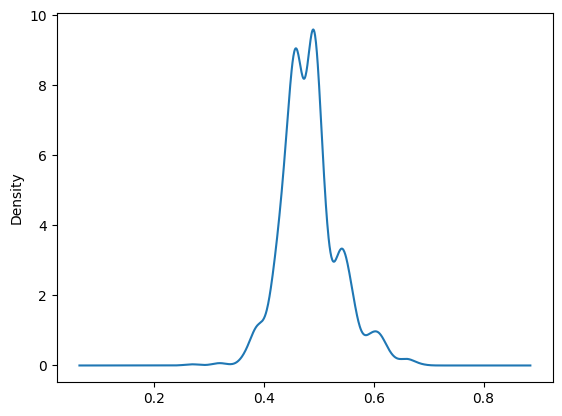

In [48]:
df["voltage"].plot.kde()

In [56]:
df["voltage"].sort_values()

691    0.27
436    0.32
709    0.32
428    0.37
822    0.37
       ... 
686    0.66
435    0.66
832    0.66
140    0.66
903    0.68
Name: voltage, Length: 919, dtype: float64

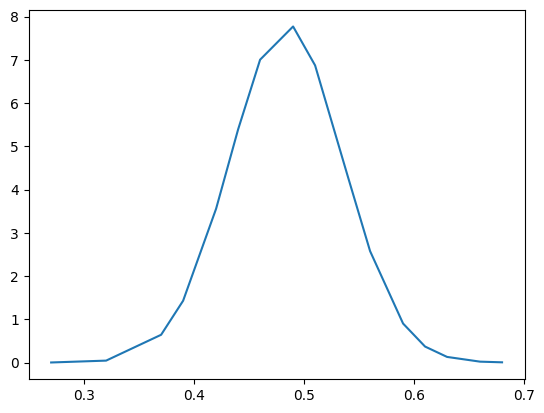

In [57]:
plt.plot(df["voltage"].sort_values(), scipy.stats.norm.pdf(df["voltage"].sort_values(), df["voltage"].mean(), df["voltage"].std()))
plt.show()